<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h1 align="center" font-weight="bold">Tarea-Práctica 7.</h1> 
<h2 align="center">Métodos de solución numérica para ecuaciones lineales y no lineales</h2> 
<hr>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import constants

plt.rcParams.update({
    "text.usetex": True,
})

<h2>1. Descomposición LU</h2>

<h3>(a), (b) y (c)</h3>

Calcula la descomposición LU de la matriz:

$$
    \begin{equation}
        \begin{pmatrix}
            2 & 1 & 4 & 1\\
            3 & 4 & -1 & -1\\
            1 & -4 & 1 & 5\\
            2 & -2 & 1 & 3
        \end{pmatrix}
        \begin{pmatrix}
        w \\ x \\ y \\ z
        \end{pmatrix}
        =
        \begin{pmatrix}
            -4\\ 3\\ 9\\ 7
        \end{pmatrix}
        \label{eq:sistemaaa}
    \end{equation}
$$

In [97]:
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)
v = np.array([-4, 3, 9, 7], float)

############ Descomposición LU ############
dim, _ = A.shape # Dimensión de la matriz

# Igualamos la matriz U a A para "ahorrarnos" la multiplicación de A
# para únicamente enfocarnos en U = L3L2L1L0
U = A.astype(float)
v = v.astype(float)
L = np.identity(dim, float)

# Eliminacion Gaussiana
for m in range(dim):
    pivote = U[m, m]
    
    for i in range(m + 1, dim):
        mult = U[i, m]
        factor = mult / pivote
        L[i, m] = factor
        U[i, :] -= factor * U[m, :] 
        v[i] -= factor * v[m]
        
############ Backsubstitution ############

x = np.empty(dim, float)  #definimos unvector x vacio

for m in range(dim - 1, -1, -1):
    x[m] = v[m]
    for i in range(m + 1, dim):
        x[m] -= U[m, i] * x[i]
    x[m] /= U[m, m]

print("a, b) Descomposición LU")
print(f"La matriz L:\n{L}")
print(f"La matriz U:\n{U}")
print("c) Multiplicación de matrices L y U")
print(f"Recuperamos la matriz original multiplicando LU:\n{L @ U}")
print(f"La matriz original A es:\n{A}")
print("Solución del sistema de ecuaciones lineales")
print(f"La solución del sistema es:\n{x}")

a, b) Descomposición LU
La matriz L:
[[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]
La matriz U:
[[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]
c) Multiplicación de matrices L y U
Recuperamos la matriz original multiplicando LU:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
La matriz original A es:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
Solución del sistema de ecuaciones lineales
La solución del sistema es:
[ 2. -1. -2.  1.]


<h3>(d) Convierte tu programa en función y resuelve el sistema</h3>

In [62]:
def LU_decomposition_solution(A, v):
    """
    Parámetros
    ------------
    A: Matriz de coeficientes
    v: Vector de términos independientes

    Devuelve
    ------------
    L: Matriz L de la descomposición LU
    U: Matriz U de la descomposición LU
    x: Solución del sistema
    """
    
    dim, _ = A.shape # Dimensión de la matriz

    # Verificamos si no tiene solución o infinitas soluciones
    # Teorema de Rouché-Frobenius
    rango = np.linalg.matrix_rank(A)
    m_aumentada = np.hstack((A, v.reshape(-1, 1)))
    rango_aum = np.linalg.matrix_rank(m_aumentada)

    if rango != rango_aum:
        raise ValueError("El sistema no tiene solución.")
    elif rango < rango_aum:
        raise ValueError("El sistema tiene infinitas soluciones.")
    
    # Igualamos la matriz U a A para "ahorrarnos" la multiplicación de A
    # para únicamente enfocarnos en U = L3L2L1L0
    U = A.astype(float)
    v = v.astype(float)
    L = np.identity(dim, float)
    
    # Eliminacion Gaussiana
    for m in range(dim):
        pivote = U[m, m]

        if pivote == 0:
            raise ValueError("El sistema tiene infinitas soluciones.")
        
        for i in range(m + 1, dim):
            mult = U[i, m]
            factor = mult / pivote
            L[i, m] = factor
            U[i, :] -= factor * U[m, :] 
            v[i] -= factor * v[m]
            
    ############ Backsubstitution ############
    
    x = np.empty(dim, float)  #definimos unvector x vacio
    
    for m in range(dim - 1, -1, -1):
        x[m] = v[m]
        for i in range(m + 1, dim):
            x[m] -= U[m, i] * x[i]
        x[m] /= U[m, m]
        
    return L, U, x

In [63]:
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)
v = np.array([-4, 3, 9, 7], float)

L, U, x = LU_decomposition_solution(A, v)

print(f"Matriz L\n{L}")
print(f"Matriz U\n{U}")
print(f"Descomposición LU:\n{L @ U}")
print(f"Matriz original\n{A}")
print(f"La solución del sistema es: \n{x}")

Matriz L
[[ 1.          0.          0.          0.        ]
 [ 1.5         1.          0.          0.        ]
 [ 0.5        -1.8         1.          0.        ]
 [ 1.         -1.2         0.83823529  1.        ]]
Matriz U
[[  2.    1.    4.    1. ]
 [  0.    2.5  -7.   -2.5]
 [  0.    0.  -13.6   0. ]
 [  0.    0.    0.   -1. ]]
Descomposición LU:
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
Matriz original
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
La solución del sistema es: 
[ 2. -1. -2.  1.]


<h3>(e) Usa numpy para resolver</h3>

In [64]:
A = np.array([[2, 1, 4, 1],
              [3, 4, -1, -1],
              [1, -4, 1, 5],
              [2, -2, 1, 3]], float)
v = np.array([-4, 3, 9, 7])

print("Solución del sistema de ecuaciones lineales es:")
print(sp.linalg.solve(A, v))

Solución del sistema de ecuaciones lineales es:
[ 2. -1. -2.  1.]


<h4>Solución a distintos sistemas de ecuaciones</h4>

In [69]:
B = np.array([[2, 3],
             [4, 9]])
w = np.array([6, 15])

_, _, sol = LU_decomposition_solution(B, w)
print(f"La solución obtenida con mi implementación es: \n{sol}")
print(f"Solución con paquetería scipy: \n{np.linalg.solve(B, w)}")
print(f"Solución con paquetería numpy: \n{sp.linalg.solve(B, w)}")

La solución obtenida con mi implementación es: 
[1.5 1. ]
Solución con paquetería scipy: 
[1.5 1. ]
Solución con paquetería numpy: 
[1.5 1. ]


In [71]:
C = np.array([[3, 2, -1],
             [2, -2, 4],
             [-1, 0.5, -1]])
z = np.array([1, -2, 0])

L, U, sol = LU_decomposition_solution(C, z)
print(f"La solución obtenida con mi implementación es: \n{sol}")
print(f"Solución con paquetería scipy: \n{np.linalg.solve(C, z)}")
print(f"Solución con paquetería numpy: \n{sp.linalg.solve(C, z)}")

La solución obtenida con mi implementación es: 
[ 1. -2. -2.]
Solución con paquetería scipy: 
[ 1. -2. -2.]
Solución con paquetería numpy: 
[ 1. -2. -2.]


In [74]:
D = np.array([[1, 3, -2],
             [3, 5, 6],
             [2, 4, 3]])
v = np.array([5, 7, 8])

_, _, sol = LU_decomposition_solution(D, v)
print(f"La solución obtenida con mi implementación es: \n{sol}")
print(f"Solución con paquetería scipy: \n{np.linalg.solve(D, v)}")
print(f"Solución con paquetería numpy: \n{sp.linalg.solve(D, v)}")

La solución obtenida con mi implementación es: 
[-15.   8.   2.]
Solución con paquetería scipy: 
[-15.   8.   2.]
Solución con paquetería numpy: 
[-15.   8.   2.]


In [76]:
E = np.array([[1, 1, 2],
             [1, 1, 1],
             [2, 2, 2]])
w = np.array([3, 1, 2])

_, _, sol = LU_decomposition_solution(E, w)
print(f"La solución obtenida con mi implementación es: \n{sol}")

ValueError: El sistema tiene infinitas soluciones.

In [77]:
A = np.array([[1, 1], [1, 1]])
v = np.array([2, 3])
LU_decomposition_solution(A, v)

ValueError: El sistema no tiene solución.

In [78]:
A = np.array([[1, 2], [2, 4]])
v = np.array([3, 6])
LU_decomposition_solution(A, v)  

ValueError: El sistema tiene infinitas soluciones.

<h2>2. Pozo cuántico asimétrico</h2>

<h3>(a) Demuestra que la ec. de Schrödinger se puede escribir en forma matricial</h3>

<h3>(b) Escribe un programa para evular tu expresión para $H_{mn}$</h3>

<span style="font-weight:bold">Operador Hamiltoniano</span>

$$
\begin{equation*}
    \hat{H} = -\dfrac{-\hbar^{2}}{2M}\dfrac{\text{d}^{2}}{\text{d}x^{2}} + V(x).
\end{equation*}
$$

<span style="font-weight:bold">Matriz asociada al Hamiltoniano $\mathbb{H}$</span>

$$
\begin{align*}
    H_{mn} &= \dfrac{2}{L}\int_{0}^{L}\sin\bigl(\tfrac{\pi mx}{L}\bigr)\hat{H}\sin\bigl(\tfrac{\pi n x}{L}\bigr)\text{d}x,\\
    H_{mn} &= \dfrac{2}{L}\int_{0}^{L}\sin\bigl(\tfrac{\pi mx}{L}\bigr)\Biggl[-\dfrac{-\hbar^{2}}{2M}\dfrac{\text{d}^{2}}{\text{d}x^{2}} + V(x)\Biggr]\sin\bigl(\tfrac{\pi n x}{L}\bigr)\text{d}x.
\end{align*}
$$

<span style="font-weight:bold">Potencial $V(x)$</span>

$$
    \begin{equation*}
        V(x) = \dfrac{ax}{L}
    \end{equation*}
$$

In [79]:
L = 5 * constants.angstrom # m
hbar = constants.hbar # J * s
m_e = constants.m_e # Masa del electrón en kg
c_e = constants.elementary_charge # Carga del electrón en C
a = 10 * c_e # J

In [80]:
def hamiltonian_mn(m, n, L):
    if m == n:
        return (hbar ** 2 * np.pi ** 2 * n ** 2) / (2 * m_e * L ** 2) +  a / 2
    elif ((m & 1) == (n & 1)):
        return 0 # Si ambos son pares o impares
    return -((8 * a) / (np.pi ** 2)) * ((m * n) / (m ** 2 - n ** 2) ** 2) # Uno par y otro impar

<h3>(c) Calcula los valores propios de esta matriz</h3>

In [81]:
def hamiltonian_op(m, n, L):    
    H = np.zeros((m, n), float)

    for i in range(m):
        for j in range(n):
            H[i, j] = hamiltonian_mn(i + 1, j + 1, L)

    # Eigenvalores y eigenvectores
    energias, ψ = sp.linalg.eigh(H)

    return energias / c_e, ψ # Energías en eV

In [82]:
energias_10, _ = hamiltonian_op(10, 10, L)

print(energias_10)

[  5.8363769   11.18109291  18.66289158  29.14419776  42.65507485
  59.18525782  78.72936019 101.28548383 126.85138575 155.55532885]


<h3>(d) Usa una matriz $100\times 100$</h3>

In [83]:
energias_100, ψ = hamiltonian_op(100, 100, L)

print(f"Las primeras 10 energías para esta matriz son: \n{energias_100[0:10]}")

Las primeras 10 energías para esta matriz son: 
[  5.8363765   11.18109158  18.66288971  29.14418896  42.65506573
  59.18520524  78.72930836 101.2848529  126.85055342 155.42570639]


<h3>(e) Calcula la función de onda $\psi(x)$ para el estado fundamental y los dos primeros estados excitados</h3>

<span style="font-weight:bold">Función de onda</span>

$$
    \begin{equation*}
        \Psi(x) = \sum_{n = 1}^{\infty} \psi_{n}\sin\bigl(\tfrac{\pi n x}{L}\bigr)
    \end{equation*}
$$

In [84]:
def funcion_onda_n(n, x, psi, L):
    f_onda = 0
    for m in range(100):
        f_onda += np.sqrt(2 / L) * psi[n, m] * np.sin((np.pi * (m + 1) * x) / L)
    return f_onda

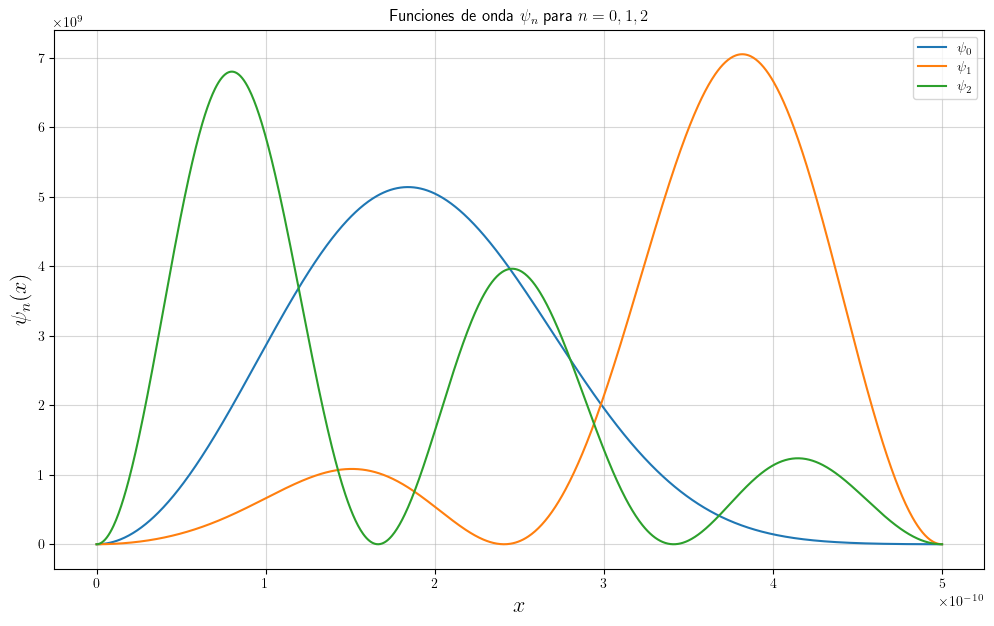

In [85]:
x = np.linspace(0, L, 1000)
ψ_0 = funcion_onda_n(0, x, ψ, L) 
ψ_1 = funcion_onda_n(1, x, ψ, L) 
ψ_2 = funcion_onda_n(2, x, ψ, L) 
# Funciones de densidad de probabilidad
ψ_0_prob = funcion_onda_n(0, x, ψ, L) ** 2
ψ_1_prob = funcion_onda_n(1, x, ψ, L) ** 2
ψ_2_prob = funcion_onda_n(2, x, ψ, L) ** 2

plt.figure(figsize=(12, 7))
plt.plot(x, ψ_0_prob, label="$\\psi_{0}$")
plt.plot(x, ψ_1_prob, label="$\\psi_{1}$")
plt.plot(x, ψ_2_prob, label="$\\psi_{2}$")
plt.title("Funciones de onda $\\psi_{n}$ para $n = 0, 1, 2$")
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$\\psi_{n}(x)$", fontsize=16)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

Verificamos que cada una de las funciones de onda para el estado base y los dos primeros estados excitados cumplan la condición de normalización:
$$
    \begin{equation*}
        \int_{0}^{L}\lvert\psi(x)\rvert^{2}\text{d}x = 1.
    \end{equation*}
$$

In [86]:
print(sp.integrate.simpson(funcion_onda_n(0, x, ψ, L) ** 2, x=x))
print(sp.integrate.simpson(funcion_onda_n(1, x, ψ, L) ** 2, x=x))
print(sp.integrate.simpson(funcion_onda_n(2, x, ψ, L) ** 2, x=x))

0.9999999999999766
1.000000000002503
1.000000000001184


<h2>3. Método de relajación</h2>

Considera la ecuación $x = 1 - \mathrm{e}^{-cx}$, donde $c$ es un parámetro conocido y $x$ desconocido.

<h3>(a) Resuelve la ecuación por método de relajación</h3>

In [87]:
x = 0.5
c = 2
for k in range(200):
    x = 1 - np.exp(-c * x)

print(f"Solución obtenida por el método de relajación:\n{x}")

Solución obtenida por el método de relajación:
0.7968121300200199


<h3>(b) Soluciones para valores de $c$ específicos</h3>

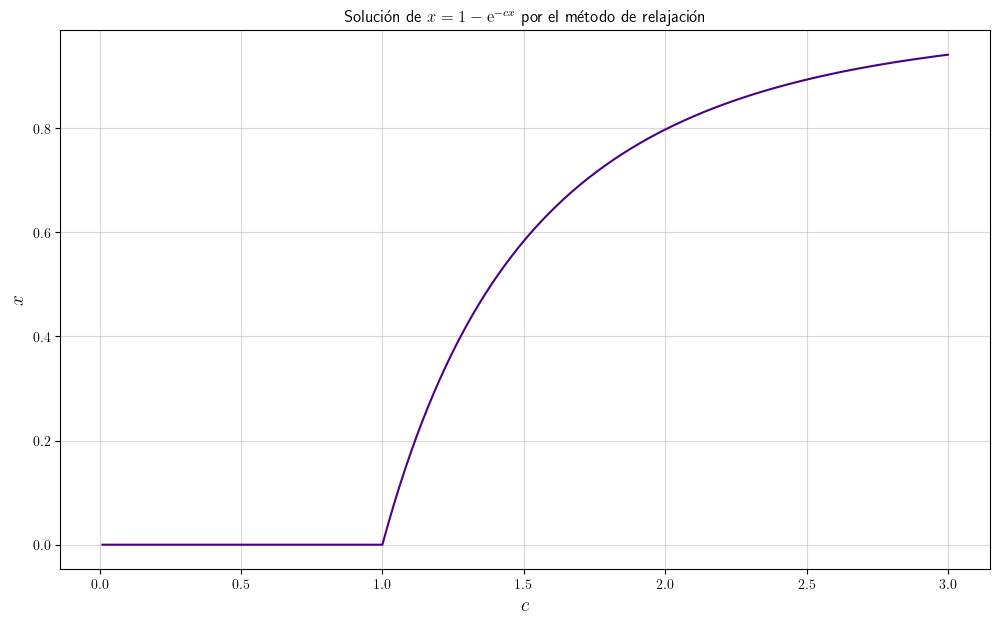

In [88]:
f = lambda x, c: 1 - np.exp(-c * x)
C = np.linspace(0.01, 3, 300) # pasos de 0.01

y = []
precision = 1e-6

for c in C:
    x1 = .5
    error = 1.

    while error > precision:
        x1, x2 = f(x1, c), x1
        # Calculamos el error
        error = np.abs(x1 - x2) / np.abs(1 - 1 / (c * np.exp(-c * x2)))
    y.append(x1)

plt.figure(figsize=(12, 7))
plt.plot(C, y, c="indigo")
plt.title("Solución de $x = 1 - \\mathrm{e}^{-cx}$ por el método de relajación")
plt.xlabel("$c$", fontsize=14)
plt.ylabel("$x$", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

<h2>4. Glucólisis</h2>

<h3>(a) Demuestre analíticamente las soluciones</h3>
La solución de estas ecuaciones es:

$$
    \begin{equation*}
        x = b,\qquad y= \dfrac{b}{a + b^{2}}
    \end{equation*}
$$

<h3>(b) Resuelve por método de relajación</h3>

$$
\begin{equation*}
    x = y\cdot(a + x^{2}),\qquad y = \dfrac{b}{a + x^{2}}
\end{equation*}
$$

In [91]:
f1 = lambda x, y: y * (a + x ** 2)
g1 = lambda x, y: b / (a + x ** 2)

precision = 1e-6
a = 1
b = 2

def puntos_estacionarios(f, g):
    x1, y1 = 0.5, 0.25
    x2, y2 = f(x1, y1), g(x1, y1)
    
    error = lambda x1, y1, x2, y2: np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
    iteraciones = 1
    
    while error(x1, y1, x2, y2) > precision:
        if iteraciones > 1000000:
            raise ValueError("No converge a una solución.")

        x1, y1 = x2, y2
        x2, y2 = f(x1, y1), g(x1, y1)
    
        iteraciones += 1
        
    print(f"La solución encontrada en {iteraciones} iteraciones es:\n x = {x2} y y = {y2}.")

In [92]:
puntos_estacionarios(f1, g1)

ValueError: No converge a una solución.

<h3>(c) Encuentra una forma diferente de reorganizar</h3>

Reordenando las expresiones llegamos a las siguientes expresiones:

$$
    \begin{align*}
        x &= \dfrac{b}{y} - a,\\
        y &= \dfrac{x}{a + x^{2}}.
    \end{align*}
$$

In [93]:
a = 1
b = 2

f2 = lambda x, y: np.sqrt((b / y) - a)
g2 = lambda x, y: x / (a + x ** 2)

In [94]:
puntos_estacionarios(f2, g2)

La solución encontrada en 29 iteraciones es:
 x = 2.0000007317806836 y y = 0.4.


<h2>5. Constante de desplazamiento de Wien</h2>

<h3>(a) Demuestra que $\lambda$ obedece al desplazamiento de Wienley</h3>

<h3>(b) Resolver ecuación con precisión $\epsilon = 10^{-6}$</h3>

In [7]:
ϵ = 1e-6 # Precisión
f = lambda x: 5 * np.exp(-x) + x - 5

def binary_search(f, x1, x2, precision):
    # Punto medio x'
    def punto_medio(x1, x2):
        return (x1 + x2) / 2
        
    while np.abs(x1 - x2) > ϵ:
        x_p = punto_medio(x1, x2)

        # Verificamos si f(x') comparte signo con f(x1)
        if f(x1) * f(x_p) > 0:
            x1 = x_p
        else:
            x2 = x_p

    return punto_medio(x1, x2)

In [21]:
binary_search(f, 2, 5, ϵ)

4.96511447429657

<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://es.wikipedia.org/wiki/Ley_de_desplazamiento_de_Wien#Descripci%C3%B3n" target="_blank">Ley de desplazamiento de Wien</a></p>

<h3>(c) Estima la temperatura de la superficie del Sol</h3>

Resolvemos la siguiente expresión para la temperatura $T$,

$$
    \begin{align*}
        \lambda &= \dfrac{b}{T},\\
        \implies\, T &= \dfrac{b}{\lambda},
    \end{align*}
$$

con $b = hc / \kappa_{B}x.$

In [24]:
def temperatura(x, λ):
    k_b = constants.k # Constante de Boltzmann
    h = constants.h # Constante de Planck
    c = constants.c # Velocidad de la luz

    b = (h * c) / (k_b * x) # Constante de desplazamiento de Wien

    return b / λ

In [26]:
ϵ = 1e-6 # Precisión
f = lambda x: 5 * np.exp(-x) + x - 5
x = binary_search(f, 2, 5, ϵ) # Solución de f
λ = 502e-9 # λ en la radiación emitida por el sol
T = temperatura(x, λ)
print(f"La temperatura de la superficie del Sol es: {T} K")

La temperatura de la superficie del Sol es: 5772.453812002484 K


<p style="font-size:10px;font-style:italic;text-align:right"><a href="https://es.wikipedia.org/wiki/Sol" target="_blank">Temperatura del Sol</a></p>

<h2>6. El punto de Lagrange</h2>

<h3>(a) Demuestra que la distancia $r$ satisface una ecuación</h3>

<h3>(b) Resuelve usando el método de Newton</h3>